# Case Study 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [3]:
df= pd.read_csv("casestudy.csv")

In [4]:
df.shape

(685927, 4)

In [5]:
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [6]:
df.dtypes

Unnamed: 0          int64
customer_email     object
net_revenue       float64
year                int64
dtype: object

In [7]:
df.isna().sum()

Unnamed: 0        0
customer_email    0
net_revenue       0
year              0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,net_revenue,year
count,685927.000000,685927.000000,685927.000000
mean,342963.000000,125.647755,2016.027252
std,198010.213384,71.854528,0.837203
min,0.000000,1.000000,2015.000000
25%,171481.500000,63.510000,2015.000000
50%,342963.000000,125.730000,2016.000000
75%,514444.500000,187.820000,2017.000000
max,685926.000000,250.000000,2017.000000


### Total Revenue for Current year

In [9]:
revenue_by_year= df.groupby('year').sum().reset_index()
df_rev=revenue_by_year[['year','net_revenue']]
df_rev.head()

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


In [10]:
df_output = df_rev.rename(columns={'net_revenue': 'Total Revenue for Current Year'})

In [11]:
df_15= df[df['year']==2015]
df_16= df[df['year']==2016]
df_17= df[df['year']==2017]


### New Customer Revenue

In [12]:
#2016
df3 = df_16.merge(df_15, on='customer_email', how='left', indicator=True)
df_temp = df3.loc[df3['_merge'] == 'left_only', 'customer_email']
d = df_16[df_16['customer_email'].isin(df_temp)]
print(f'The total revenue of new customer in year 2016:',d['net_revenue'].sum())

The total revenue of new customer in year 2016: 18245491.01


In [13]:
#2017
df10 = df_17.merge(df_16, on='customer_email', how='left', indicator=True)
df_temp1 = df10.loc[df10['_merge'] == 'left_only', 'customer_email']
d1 = df_17[df_17['customer_email'].isin(df_temp1)]
print(f'The total revenue of new customer in year 2017:',d1['net_revenue'].sum())

The total revenue of new customer in year 2017: 28776235.039999995


In [14]:
new_customers_rev = ['NA',d['net_revenue'].sum(),d1['net_revenue'].sum()]
df_output['New Customer Revenue']=new_customers_rev 

### Existing Customer Growth

In [15]:
#2016
df_4=pd.merge(df_15, df_16, on='customer_email', how='inner')
existing_growth_2016=df_4['net_revenue_y'].sum()-df_4['net_revenue_x'].sum()
print('The existing customer growth for 2016:',existing_growth_2016)

The existing customer growth for 2016: 20335.459999999963


In [16]:
#2017
df_5=pd.merge(df_16, df_17, on='customer_email', how='inner')
existing_growth_2017=df_5['net_revenue_y'].sum()-df_5['net_revenue_x'].sum()
print('The existing customer growth for 2017:',existing_growth_2017)

The existing customer growth for 2017: 20611.340000000317


In [17]:
existing_growth_rate = ['NA',existing_growth_2016,existing_growth_2017]
df_output['Existingn Growth Rate']=existing_growth_rate

### Existing Customer Revenue Current Year

In [18]:
#2016
existing_customer_revenue_2016=df_4['net_revenue_y'].sum()
print('The existing customer revenue for the year 2016:',existing_customer_revenue_2016)

The existing customer revenue for the year 2016: 7485452.58


In [19]:
#2017
existing_customer_revenue_2017=df_5['net_revenue_y'].sum()
print('The existing customer revenue for the year 2017:',existing_customer_revenue_2017)

The existing customer revenue for the year 2017: 2641259.99


In [20]:
existing_customer_revenue = ['NA',existing_customer_revenue_2016,existing_customer_revenue_2017]
df_output['Existing Customer Revenue Current Year']=existing_customer_revenue

### Existing Customer Revenue Prior Year

In [21]:
#2016
existing_customer_revenue_2016_prior=df_4['net_revenue_x'].sum()
print('The existing customer revenue prior to the year 2016:',existing_customer_revenue_2016_prior)

The existing customer revenue prior to the year 2016: 7465117.12


In [22]:
#2017
existing_customer_revenue_2017_prior=df_5['net_revenue_x'].sum()
print('The existing customer revenue prior to the year 2017:',existing_customer_revenue_2017_prior)

The existing customer revenue prior to the year 2017: 2620648.65


In [23]:
existing_customer_revenue_prior = ['NA',existing_customer_revenue_2016_prior,existing_customer_revenue_2017_prior]
df_output['Existing Customer Revenue Prior Year']=existing_customer_revenue_prior

### Total Customer Current Year

In [24]:
#Total Customer 

total_customer_15=len(df_15)
total_customer_16=len(df_16)
total_customer_17=len(df_17)
print('Total Number of Customer for year 2015',total_customer_15)
print('Total Number of Customer for year 2016',total_customer_16)
print('Total Number of Customer for year 2017',total_customer_17)

Total Number of Customer for year 2015 231294
Total Number of Customer for year 2016 204646
Total Number of Customer for year 2017 249987


In [25]:
total_customer = [total_customer_15,total_customer_16,total_customer_17]
df_output['Total Customer Current Year']=total_customer

### Total Customers Previous Year

In [26]:
print('Total Number of Customer for  previous to the year 2016',total_customer_15)
print('Total Number of Customer for previous to the year 2017',total_customer_16)

Total Number of Customer for  previous to the year 2016 231294
Total Number of Customer for previous to the year 2017 204646


In [27]:
total_customer_previous = ['NA',total_customer_15,total_customer_16]
df_output['Total Customer Previous Year']=total_customer_previous

### New Customers

In [28]:
#New Customers
new_customer_2016=len(d)
new_customer_2017=len(d1)
print('New Customer in year 2016',new_customer_2016)
print('New Customer in year 2017',new_customer_2017)

New Customer in year 2016 145062
New Customer in year 2017 229028


In [29]:
New_Customer = ['NA',new_customer_2016,new_customer_2017]
df_output['New Customers']=New_Customer

### Lost Customers

In [30]:
##2016
df3 = df_15.merge(df_16, on='customer_email', how='left', indicator=True)
df_temp = df3.loc[df3['_merge'] == 'left_only', 'customer_email']
dl = df_15[df_15['customer_email'].isin(df_temp)]
Lost_customer_2016=len(dl)
print('Lost Customer in year 2016',Lost_customer_2016)

Lost Customer in year 2016 171710


In [31]:
#2017
df10 = df_16.merge(df_17, on='customer_email', how='left', indicator=True)
df_temp1 = df10.loc[df10['_merge'] == 'left_only', 'customer_email']
d1l = df_16[df_16['customer_email'].isin(df_temp1)]
Lost_customer_2017=len(d1l)
print('Lost Customer in year 2017',Lost_customer_2017)

Lost Customer in year 2017 183687


In [32]:
Lost_Customer = ['NA',Lost_customer_2016,Lost_customer_2017]
df_output['Lost Customers']=Lost_Customer

In [33]:
### Revenue Lost from attrition

In [34]:
#2016
#Formula: lost customers revenue - new customers revenue/ customer revenue last year
da= (dl['net_revenue'].sum()-d['net_revenue'].sum())/(df_15['net_revenue']).sum()
#print(dl['net_revenue'].sum(),d['net_revenue'].sum(),(df_15['net_revenue']).sum())
print(da)

0.11454936081982266


In [35]:
#2017
da_17= (d1l['net_revenue'].sum()-d1['net_revenue'].sum())/(df_16['net_revenue']).sum()
#print((d1l['net_revenue'].sum(),d1['net_revenue'].sum(),(df_16['net_revenue']).sum()))
print(da_17)

-0.22019946840200577


In [36]:
Lost_Customer = ['NA',da,da_17]
df_output['Revenue Lost From Attrition']=Lost_Customer

### Final Output

In [37]:
df_output.transpose()

,0,1,2
year,2015,2016,2017
Total Revenue for Current Year,29036749.19,25730943.59,31417495.03
New Customer Revenue,NA,18245491.01,28776235.04
Existingn Growth Rate,NA,20335.46,20611.34
Existing Customer Revenue Current Year,NA,7485452.58,2641259.99
Existing Customer Revenue Prior Year,NA,7465117.12,2620648.65
Total Customer Current Year,231294,204646,249987
Total Customer Previous Year,NA,231294,204646
New Customers,NA,145062,229028
Lost Customers,NA,171710,183687


### Data Visualizations

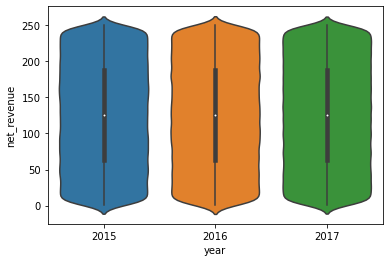

In [38]:
sn.violinplot(data= df,x="year", y="net_revenue")
plt.show()

From the above graph we can observe that the net revenue for each year almost appears similar. As seen in the graph the range and variance appear to be nearly same for every year.
The net revenue has remaind constant each year.


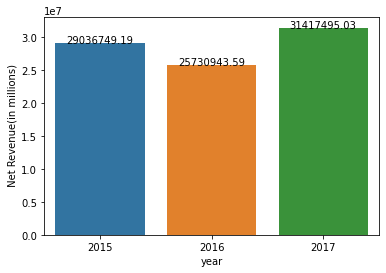

In [39]:
groupedvalues = df.groupby('year').sum().reset_index()
ax = sn.barplot(x='year',y='net_revenue',
                 data=groupedvalues,)
for index, row in groupedvalues.iterrows():
    ax.text(row.name,row.net_revenue, round(row.net_revenue,2), color='black', ha="center")
plt.ylabel(' Net Revenue(in millions)')
plt.show()

From the above graph we can see that the net revenue for year 2017 is the highest. Net revenue drooped in the year 2016. But it recoverd in the year 2017

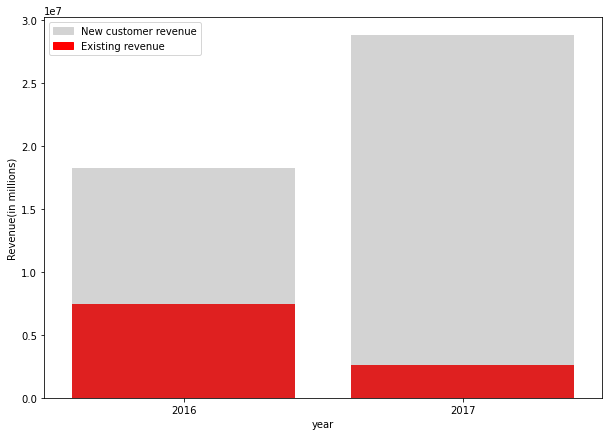

In [40]:
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize = (10,7))
sn.barplot( y='New Customer Revenue',x='year', data= df_output[1:3],color="lightgray")
sn.barplot(y='Existing Customer Revenue Current Year',x='year', data= df_output[1:3], color="red")
a = mpatches.Patch(color='lightgray', label='New customer revenue')
b = mpatches.Patch(color='red',label='Existing revenue')
plt.ylabel('Revenue(in millions)')
plt.legend(handles=[a,b])
plt.show()




From the above graph we can see that existing customer revenue has decreased in 2017 as compared to 2016. We can also observe that the total revenue for new customers has increased in 2017 as compared to 2016

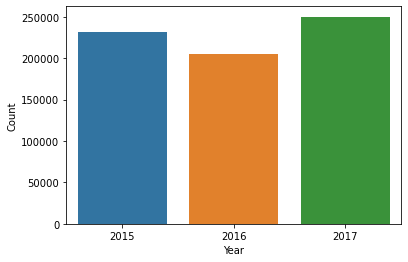

In [41]:
sn.barplot(x= 'year', y='Total Customer Current Year', data= df_output)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


From the above plot we can see that the the company number of customers declined in 2016 compared to 2015 and again ganied back its customer in 2017